# Agricultural Exports Categories Analysis
*by Sergio Postigo and Víctor Diví*

## 6. Model Building

In this section we will create predictive models using different approaches

In [3]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec
from tqdm.notebook import tqdm

train = pd.read_csv('../data/preprocessed_data/train_data.csv')
test = pd.read_csv('../data/preprocessed_data/test_data.csv')

comercial_description_model = Doc2Vec.load('../models/comercial_descriptions_doc2vec_model')
custom_description_model = Doc2Vec.load('../models/custom_descriptions_doc2vec_model')

### 6.1. Dataframe building

First, let's create the train and test dataframes.
We start by computing the numerical representation of the text fields (namely *Descripcion Comercial* and *Descripcion de la Partida Aduanera*) using the previously created models

In [4]:
train_comercial = [comercial_description_model.infer_vector(row.split(), epochs=10) for row in
                   tqdm(train['Descripcion Comercial'].values)]
train_customs = [comercial_description_model.infer_vector(row.split(), epochs=10) for row in
                 tqdm(train['Descripcion de la Partida Aduanera'].values)]

  0%|          | 0/207540 [00:00<?, ?it/s]

 69%|██████▉   | 142941/207540 [01:10<00:23, 2758.75it/s]

  0%|          | 0/207540 [00:00<?, ?it/s]

In [5]:
comercial_columns = [f'Descripcion Comercial {i}' for i in range(len(train_comercial[0]))]
customs_columns = [f'Descripcion de la Partida Aduanera {i}' for i in range(len(train_comercial[0]))]

In [6]:
train_comercial_df = pd.DataFrame(train_comercial, columns=comercial_columns)
train_customs_df = pd.DataFrame(train_customs, columns=customs_columns)
train_df = pd.concat([train, train_comercial_df, train_customs_df], axis=1)
train_df.head()

,Fecha,Pais de Destino,Descripcion Comercial,Descripcion de la Partida Aduanera,usd_kg,Categoría macro Aurum,Descripcion Comercial 0,Descripcion Comercial 1,Descripcion Comercial 2,Descripcion Comercial 3,...,Descripcion de la Partida Aduanera 0,Descripcion de la Partida Aduanera 1,Descripcion de la Partida Aduanera 2,Descripcion de la Partida Aduanera 3,Descripcion de la Partida Aduanera 4,Descripcion de la Partida Aduanera 5,Descripcion de la Partida Aduanera 6,Descripcion de la Partida Aduanera 7,Descripcion de la Partida Aduanera 8,Descripcion de la Partida Aduanera 9
0,4,arabia saudita,granadas frescas cajas variead wonderful acoge...,demas frutas frutos frescos,0.549177,Granada,-0.068604,0.037443,-0.010614,0.166878,...,-0.055955,0.063358,0.078829,0.121773,0.071000,0.079988,0.163041,0.021483,-0.047729,0.007524
1,5,canada,quinua blanca sacos consumo humano acoge resti...,demas alforfon mijo alpiste demas cereales,0.486531,Quinua,-0.049396,-0.008919,-0.015385,0.125162,...,-0.086271,0.044042,0.049574,0.220923,0.058696,0.018123,0.252361,0.084585,-0.232853,-0.003616
2,10,reino unido,esparragos frescos uso consumo humano acoge re...,esparragos frescos refrigerados,0.229562,Espárrago,-0.118470,0.197106,0.071554,-0.084339,...,-0.071160,0.071954,-0.003953,0.219558,0.020896,0.062177,0.325325,0.131082,-0.279882,0.004696
3,8,estados unidos,mandarinas frescas cajas variedad tango acoge ...,demas clementinas,0.833333,Mandarina,-0.041826,0.074012,0.040758,0.088749,...,-0.151388,0.055839,0.049570,0.197936,0.049506,0.136199,0.289758,0.106724,-0.194627,0.004580
4,6,japon,arveja fresca dulce cajas acoge drawback,arvejas guisantes chicharos pisum sativum fres...,0.225000,Arveja,0.071087,0.045117,-0.009495,0.104011,...,-0.018041,0.070300,-0.057135,0.133661,0.019206,0.058474,0.141268,0.079613,-0.060444,0.026733


In [7]:
test_comercial = [comercial_description_model.infer_vector(row.split(), epochs=10) for row in
                  tqdm(test['Descripcion Comercial'].values)]
test_customs = [comercial_description_model.infer_vector(row.split(), epochs=10) for row in
                tqdm(test['Descripcion de la Partida Aduanera'].values)]

  0%|          | 0/51885 [00:00<?, ?it/s]

  0%|          | 0/51885 [00:00<?, ?it/s]

In [8]:
test_comercial_df = pd.DataFrame(test_comercial, columns=comercial_columns)
test_customs_df = pd.DataFrame(test_customs, columns=customs_columns)
test_df = pd.concat([test, test_comercial_df, test_customs_df], axis=1)
test_df.head()

,Fecha,Pais de Destino,Descripcion Comercial,Descripcion de la Partida Aduanera,usd_kg,Categoría macro Aurum,Descripcion Comercial 0,Descripcion Comercial 1,Descripcion Comercial 2,Descripcion Comercial 3,...,Descripcion de la Partida Aduanera 0,Descripcion de la Partida Aduanera 1,Descripcion de la Partida Aduanera 2,Descripcion de la Partida Aduanera 3,Descripcion de la Partida Aduanera 4,Descripcion de la Partida Aduanera 5,Descripcion de la Partida Aduanera 6,Descripcion de la Partida Aduanera 7,Descripcion de la Partida Aduanera 8,Descripcion de la Partida Aduanera 9
0,7,rumania,quinua blanca convencional presentado per bag ...,demas alforfon mijo alpiste demas cereales,0.684932,Quinua,-0.109311,0.147417,0.089321,0.120069,...,-0.099821,0.074246,0.072087,0.268335,0.077899,0.141141,0.330849,0.066543,-0.234615,-0.011877
1,7,china,arandanos frescos cajas cold treatment acoge d...,arandanos murtones demas frutos genero vaccini...,0.150000,Arándano,0.003644,0.102125,0.016495,0.087753,...,-0.100104,0.135632,0.012508,0.190028,0.040781,0.166999,0.187837,0.067434,-0.103967,0.024842
2,10,chile,zapallo fresco lotes agranel producto agricola...,calabazas zapallos calabacines cucurbita spp,10.000000,Zapallo,-0.069127,-0.037223,-0.042182,-0.024262,...,-0.101580,0.036916,0.017835,0.121322,0.090171,-0.004866,0.176593,0.067129,-0.053787,0.049572
3,12,mexico,pimiento paprika entero seco codigo restitucio...,demas pimienta genero piper frutos generos cap...,0.280171,Paprika,0.008220,0.078914,-0.054722,0.078294,...,-0.199919,0.114463,0.127268,0.289624,0.090403,0.175353,0.356004,0.307100,-0.058419,-0.047072
4,9,paises bajos,ramos flores frescas wax flower white grado we...,demas flores capullos cortados ramos adornos f...,0.306558,Flores,-0.080344,0.190538,0.058393,0.258082,...,-0.123319,-0.014682,0.150617,0.007575,0.026218,0.004096,0.079618,0.167930,0.032075,-0.035850


Then, we codify categorical fields (namely *Fecha* and *Pais de Destino*) into a set of binary fields
Note that for *Pais de Destino*, there's the possibility that during the down-sampling of the data some country were lost. If that were the case, we would need to go to the raw data to build the sets.

In [9]:
from sklearn.preprocessing import OneHotEncoder
import unidecode

all_countries = pd.read_csv('../data/raw_data/data.csv', encoding='latin-1', sep=';')["Pais de Destino"].unique()
all_countries = [unidecode.unidecode(country.lower()) for country in all_countries]

C:\Users\Victor\AppData\Local\Temp\ipykernel_1160\2337497206.py:4: DtypeWarning: Columns (6,14,16,22,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  all_countries = pd.read_csv('../data/raw_data/data.csv', encoding='latin-1', sep=';')["Pais de Destino"].unique()


In [10]:
country_encoder = OneHotEncoder(categories=[all_countries])

train_countries = country_encoder.fit_transform(train_df['Pais de Destino'].values.reshape(-1, 1))
test_countries = country_encoder.fit_transform(test_df['Pais de Destino'].values.reshape(-1, 1))

In [11]:
train_countries_df = pd.DataFrame.sparse.from_spmatrix(train_countries, columns=all_countries)
test_countries_df = pd.DataFrame.sparse.from_spmatrix(test_countries, columns=all_countries)

train_countries_df.head()

,chile,australia,jordania,brasil,estados unidos,espana,suiza,italia,aruba,paises bajos,...,gabon,togo,mozambique,nueva caledonia,benin,bahamas,zambia,cabo verde,barbados,serbia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
month_encoder = OneHotEncoder()

train_months = month_encoder.fit_transform(train_df['Fecha'].values.reshape(-1, 1))
test_months = month_encoder.fit_transform(test_df['Fecha'].values.reshape(-1, 1))

In [13]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
          'December']
train_months_df = pd.DataFrame.sparse.from_spmatrix(train_months, columns=months)
test_months_df = pd.DataFrame.sparse.from_spmatrix(test_months, columns=months)

train_months_df.head()

,January,February,March,April,May,June,July,August,September,October,November,December
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
train_df = pd.concat([train_df, train_countries_df, train_months_df], axis=1)
test_df = pd.concat([test_df, test_countries_df, test_months_df], axis=1)

train_df.head()

,Fecha,Pais de Destino,Descripcion Comercial,Descripcion de la Partida Aduanera,usd_kg,Categoría macro Aurum,Descripcion Comercial 0,Descripcion Comercial 1,Descripcion Comercial 2,Descripcion Comercial 3,...,March,April,May,June,July,August,September,October,November,December
0,4,arabia saudita,granadas frescas cajas variead wonderful acoge...,demas frutas frutos frescos,0.549177,Granada,-0.068604,0.037443,-0.010614,0.166878,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,canada,quinua blanca sacos consumo humano acoge resti...,demas alforfon mijo alpiste demas cereales,0.486531,Quinua,-0.049396,-0.008919,-0.015385,0.125162,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,reino unido,esparragos frescos uso consumo humano acoge re...,esparragos frescos refrigerados,0.229562,Espárrago,-0.118470,0.197106,0.071554,-0.084339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,8,estados unidos,mandarinas frescas cajas variedad tango acoge ...,demas clementinas,0.833333,Mandarina,-0.041826,0.074012,0.040758,0.088749,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6,japon,arveja fresca dulce cajas acoge drawback,arvejas guisantes chicharos pisum sativum fres...,0.225000,Arveja,0.071087,0.045117,-0.009495,0.104011,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
usd_kg = ['usd_kg']
train_usd_kg = train['usd_kg'].tolist()
test_usd_kg = test['usd_kg'].tolist()

### 6.2. Multi-Layer Perceptron

In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#### 6.2.1. Using only text columns

##### 6.2.1.1 Using *Descripcion Comercial* (comercial description)

In [74]:
clf_comercial = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000,
                              early_stopping=True, verbose=True)
clf_comercial.fit(train_df[comercial_columns].values, train_df['Categoría macro Aurum'].values)

Iteration 1, loss = 2.87509800
Validation score: 0.183001
Iteration 2, loss = 2.61662627
Validation score: 0.251518
Iteration 3, loss = 2.45426747
Validation score: 0.294401
Iteration 4, loss = 2.38231389
Validation score: 0.316228
Iteration 5, loss = 2.33030667
Validation score: 0.326973
Iteration 6, loss = 2.29973818
Validation score: 0.334056
Iteration 7, loss = 2.28100874
Validation score: 0.340898
Iteration 8, loss = 2.26171304
Validation score: 0.346006
Iteration 9, loss = 2.24070488
Validation score: 0.355498
Iteration 10, loss = 2.22099767
Validation score: 0.360461
Iteration 11, loss = 2.20398778
Validation score: 0.362581
Iteration 12, loss = 2.19053749
Validation score: 0.368074
Iteration 13, loss = 2.17980223
Validation score: 0.371206
Iteration 14, loss = 2.17175275
Validation score: 0.371446
Iteration 15, loss = 2.16559917
Validation score: 0.374289
Iteration 16, loss = 2.16047802
Validation score: 0.373567
Iteration 17, loss = 2.15601790
Validation score: 0.374723
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

Now we will test the accuracy of the model using our testing data

In [75]:
predictions = clf_comercial.predict(test_df[comercial_columns].values)

Get the % of accuracy

In [76]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.40901994796183866
F1-score: 0.18859536458435686


Create a confusion matrix

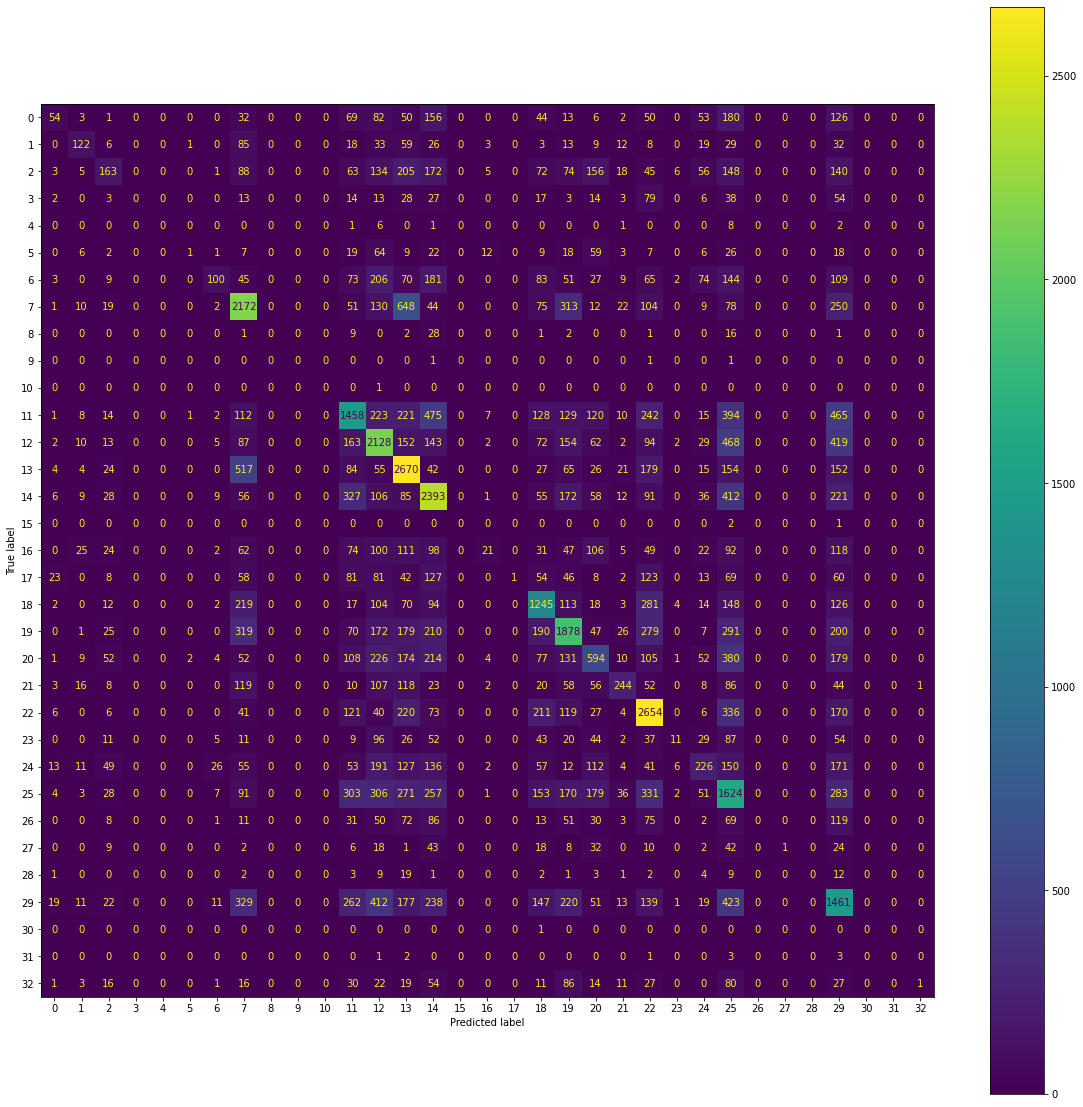

In [77]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

##### 6.2.1.2 Using *Descripcion de la Partida Aduanera* (customs description)

In [78]:
clf_customs = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000,
                            early_stopping=True, verbose=True)
clf_customs.fit(train_df[customs_columns].values, train_df['Categoría macro Aurum'].values)

Iteration 1, loss = 2.53922884
Validation score: 0.479377
Iteration 2, loss = 1.63674914
Validation score: 0.597620
Iteration 3, loss = 1.31117147
Validation score: 0.677171
Iteration 4, loss = 1.13923108
Validation score: 0.696540
Iteration 5, loss = 1.04339602
Validation score: 0.710706
Iteration 6, loss = 0.97621541
Validation score: 0.729787
Iteration 7, loss = 0.92033332
Validation score: 0.748916
Iteration 8, loss = 0.87016648
Validation score: 0.764720
Iteration 9, loss = 0.82448266
Validation score: 0.782500
Iteration 10, loss = 0.78015735
Validation score: 0.799364
Iteration 11, loss = 0.74019907
Validation score: 0.811795
Iteration 12, loss = 0.70824779
Validation score: 0.818493
Iteration 13, loss = 0.68259299
Validation score: 0.825287
Iteration 14, loss = 0.66096601
Validation score: 0.831743
Iteration 15, loss = 0.64248678
Validation score: 0.835261
Iteration 16, loss = 0.62604074
Validation score: 0.840127
Iteration 17, loss = 0.61205661
Validation score: 0.841669
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

Now we will test the accuracy of the model using our testing data

In [79]:
predictions = clf_customs.predict(test_df[customs_columns].values)

Get the % of accuracy

In [80]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.8890816228196974
F1-score: 0.6330282851528161


Create a confusion matrix


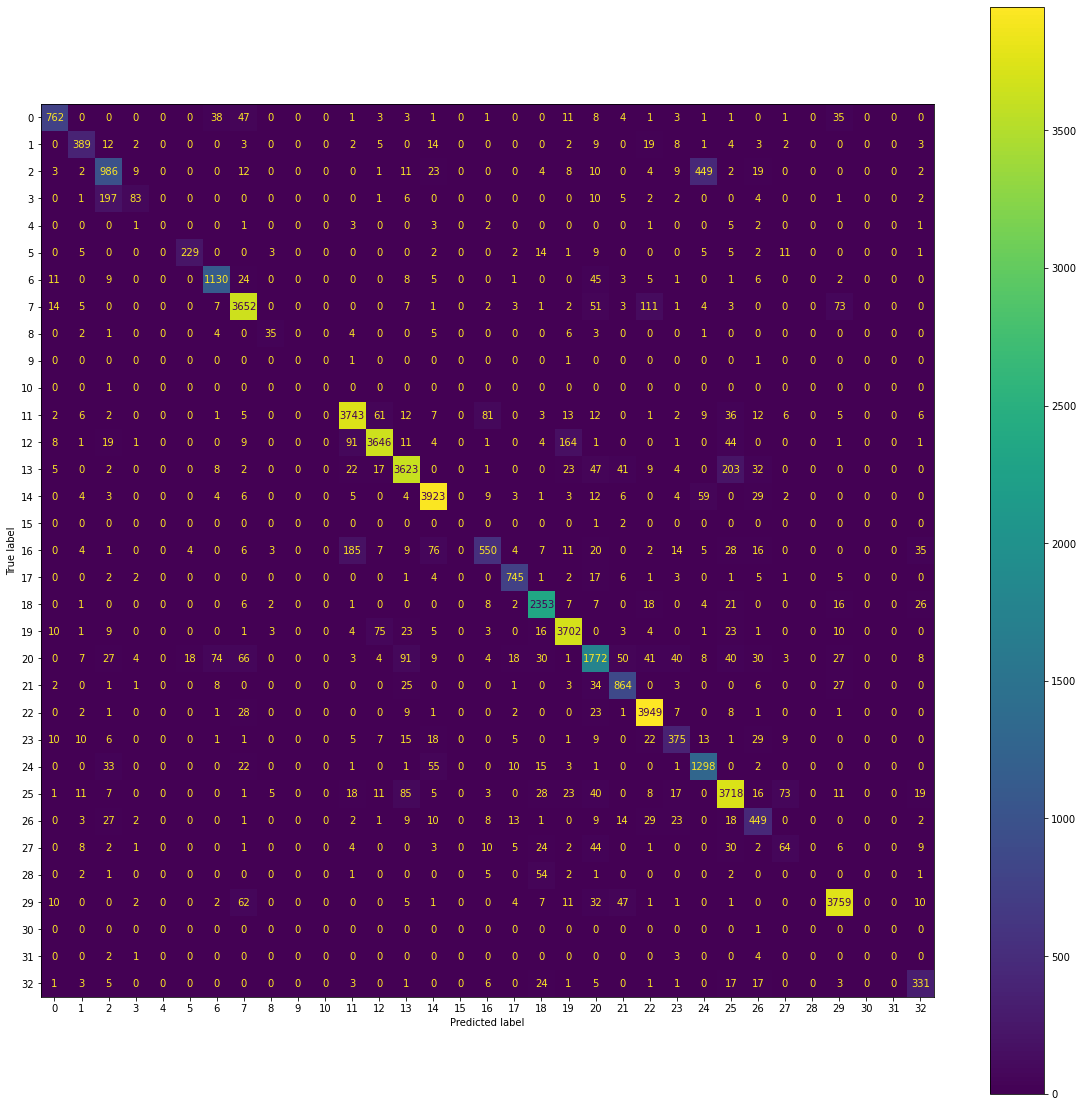

In [81]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

##### 6.2.1.3 Using *Descripcion Comercial* (comercial description) and *Descripcion de Partida Aduanera* (customs description)

In [82]:
clf_descriptions = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1,
                                 max_iter=1000, early_stopping=True, verbose=True)
clf_descriptions.fit(train_df[customs_columns + comercial_columns].values, train_df['Categoría macro Aurum'].values)

Iteration 1, loss = 2.38561938
Validation score: 0.504577
Iteration 2, loss = 1.50002875
Validation score: 0.639973
Iteration 3, loss = 1.21370649
Validation score: 0.703093
Iteration 4, loss = 1.04603859
Validation score: 0.729642
Iteration 5, loss = 0.96932775
Validation score: 0.745447
Iteration 6, loss = 0.91473590
Validation score: 0.760528
Iteration 7, loss = 0.86743686
Validation score: 0.773393
Iteration 8, loss = 0.82452308
Validation score: 0.785632
Iteration 9, loss = 0.78421442
Validation score: 0.793967
Iteration 10, loss = 0.74351773
Validation score: 0.809723
Iteration 11, loss = 0.70025948
Validation score: 0.821625
Iteration 12, loss = 0.65843966
Validation score: 0.834152
Iteration 13, loss = 0.62527876
Validation score: 0.840657
Iteration 14, loss = 0.60255581
Validation score: 0.842777
Iteration 15, loss = 0.58666909
Validation score: 0.846584
Iteration 16, loss = 0.57447096
Validation score: 0.851884
Iteration 17, loss = 0.56356288
Validation score: 0.852944
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

Now we will test the accuracy of the model using our testing data

In [83]:
predictions = clf_descriptions.predict(test_df[customs_columns + comercial_columns].values)

Get the % of accuracy

In [84]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.8942468921653657
F1-score: 0.6276815074644023


Create a confusion matrix

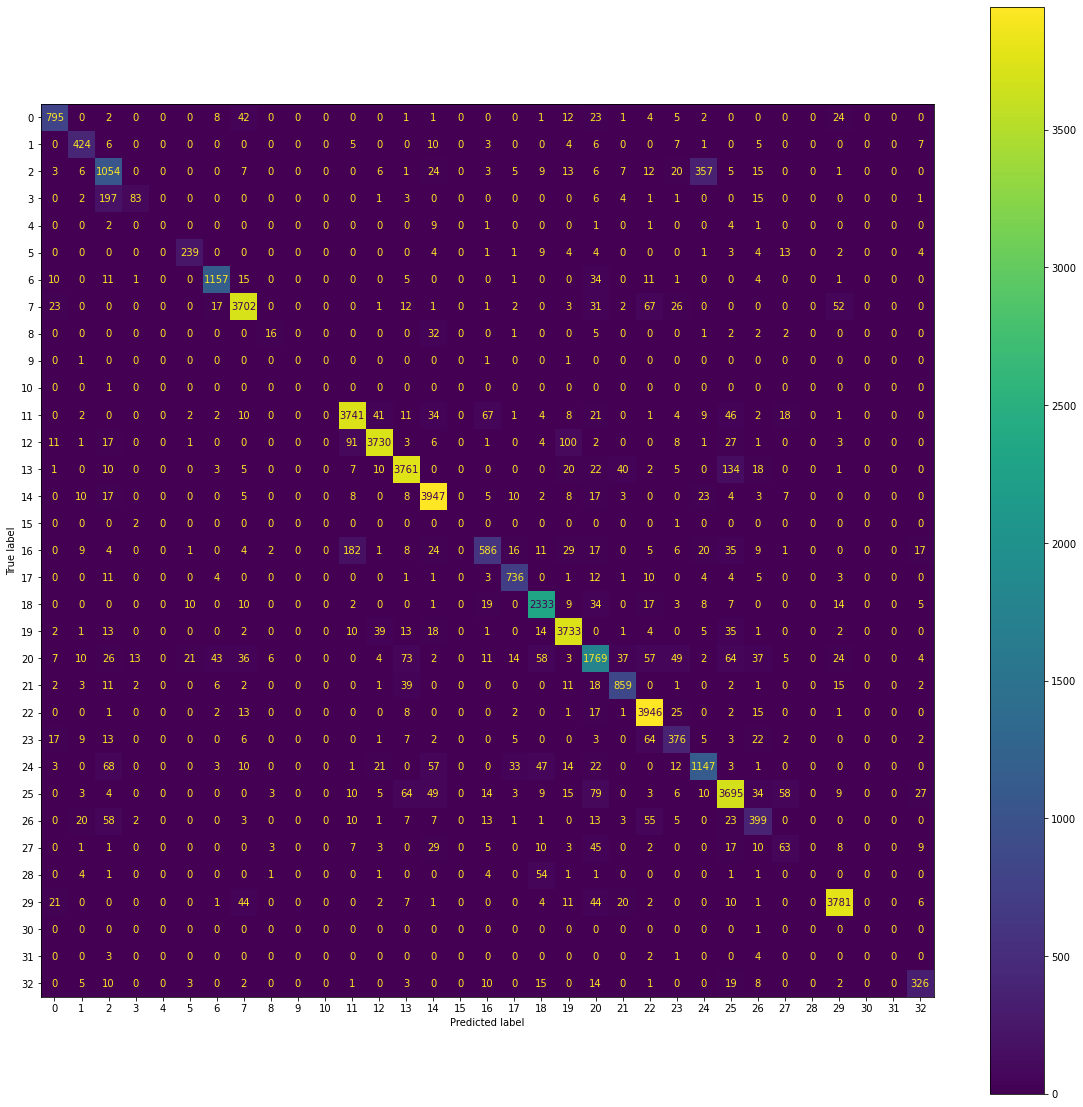

In [85]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### 6.2.2. Using all data

In [86]:
clf_full = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000,
                         early_stopping=True, verbose=True)
clf_full.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
             train_df['Categoría macro Aurum'].values)

Iteration 1, loss = 2.61578028
Validation score: 0.457647
Iteration 2, loss = 1.48060863
Validation score: 0.689602
Iteration 3, loss = 1.06858340
Validation score: 0.742026
Iteration 4, loss = 0.92618562
Validation score: 0.763997
Iteration 5, loss = 0.84985091
Validation score: 0.782741
Iteration 6, loss = 0.80162340
Validation score: 0.793196
Iteration 7, loss = 0.76797623
Validation score: 0.800231
Iteration 8, loss = 0.73859596
Validation score: 0.808663
Iteration 9, loss = 0.71405949
Validation score: 0.815843
Iteration 10, loss = 0.67345908
Validation score: 0.824998
Iteration 11, loss = 0.63378650
Validation score: 0.833960
Iteration 12, loss = 0.61138032
Validation score: 0.838393
Iteration 13, loss = 0.59211359
Validation score: 0.843982
Iteration 14, loss = 0.57578823
Validation score: 0.845957
Iteration 15, loss = 0.56210286
Validation score: 0.847307
Iteration 16, loss = 0.55061585
Validation score: 0.850728
Iteration 17, loss = 0.54038729
Validation score: 0.854630
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

In [87]:
predictions = clf_full.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

Get the % of accuracy

In [88]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.911515852365809
F1-score: 0.6463423646873578


Create a confusion matrix

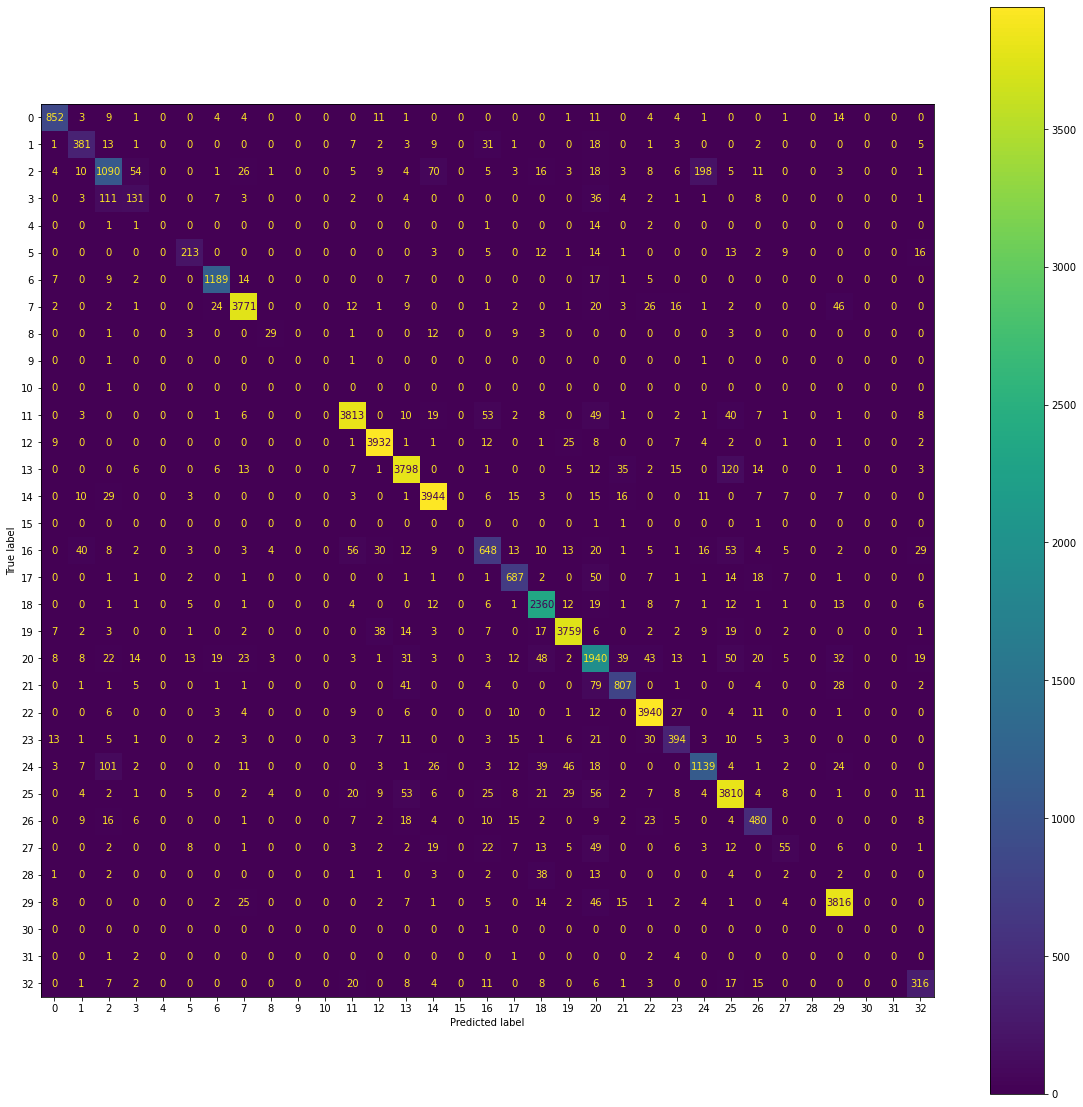

In [89]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

### 6.3 Linear Models

In [51]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#### 6.3.1 Ridge Regression

In [52]:
rc_model = RidgeClassifier(random_state=1)
rc_model.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
             train_df['Categoría macro Aurum'].values)

RidgeClassifier(random_state=1)

In [53]:
predictions = rc_model.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [54]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.7303652307988822
F1-score: 0.37293225541431746


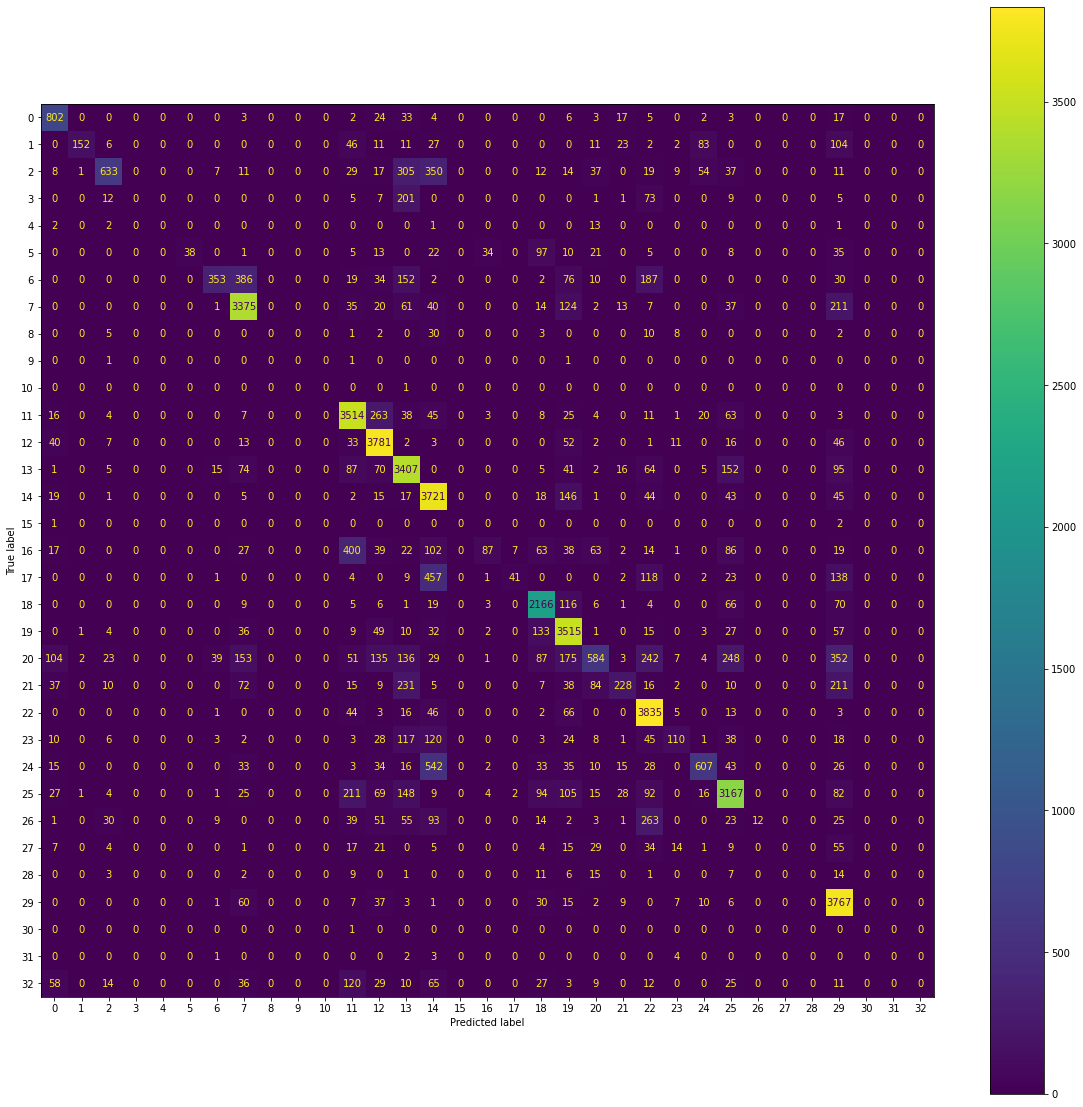

In [55]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### 6.3.2 Logistic Regression

In [56]:
lr_model = LogisticRegression(random_state=1)
lr_model.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
             train_df['Categoría macro Aurum'].values)

C:\Users\Victor\.virtualenvs\Project-ZNGcP0TM\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [57]:
predictions = lr_model.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [58]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.4443095306928785
F1-score: 0.1899993637201721


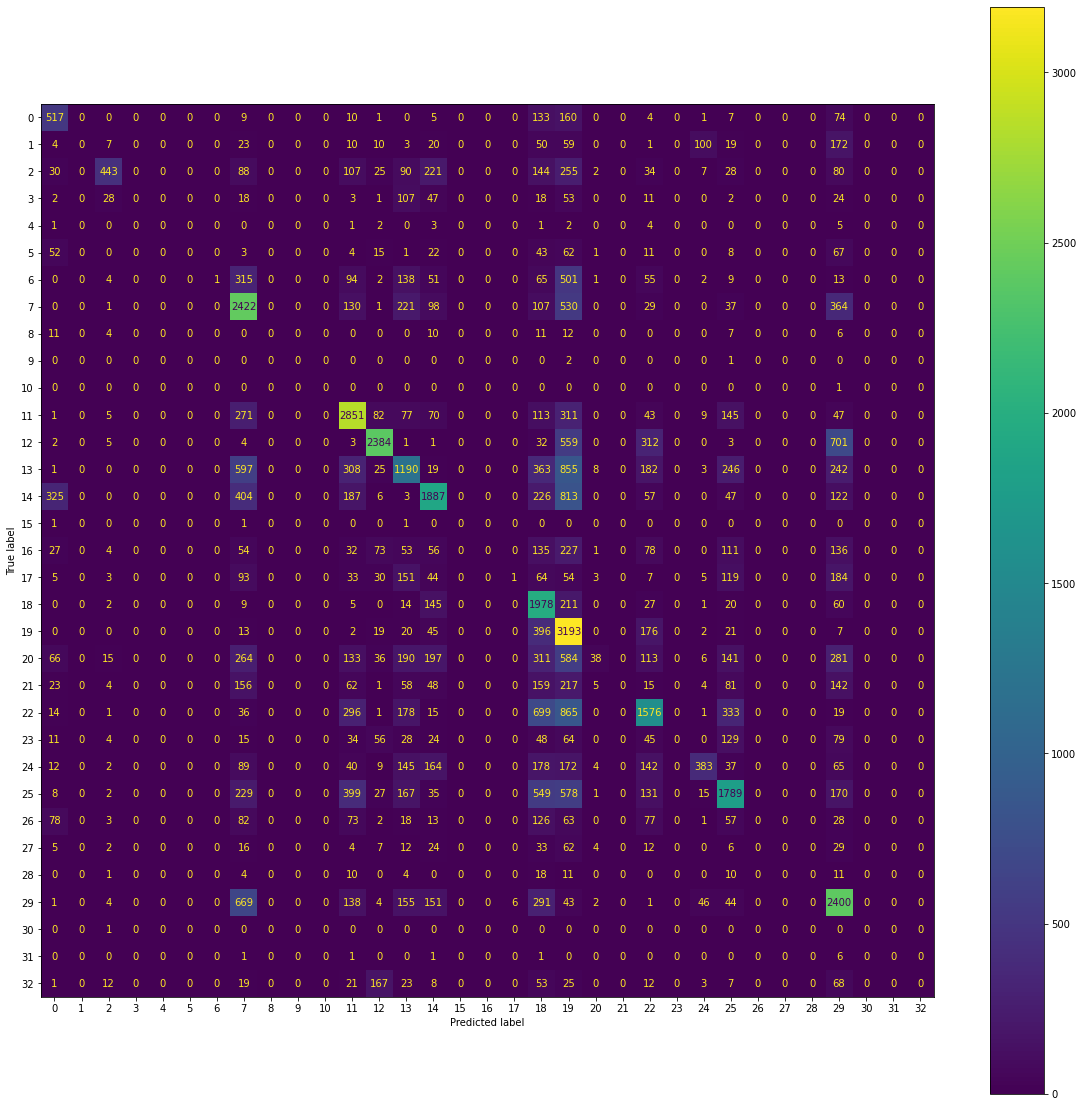

In [59]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

### 6.4 Ensembles

In [60]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#### 6.4.1 Random Forest

In [61]:
rfc_model = RandomForestClassifier(random_state=1)
rfc_model.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
              train_df['Categoría macro Aurum'].values)

RandomForestClassifier(random_state=1)

In [62]:
predictions = rfc_model.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [63]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.9693745783945263
F1-score: 0.8052988224177415


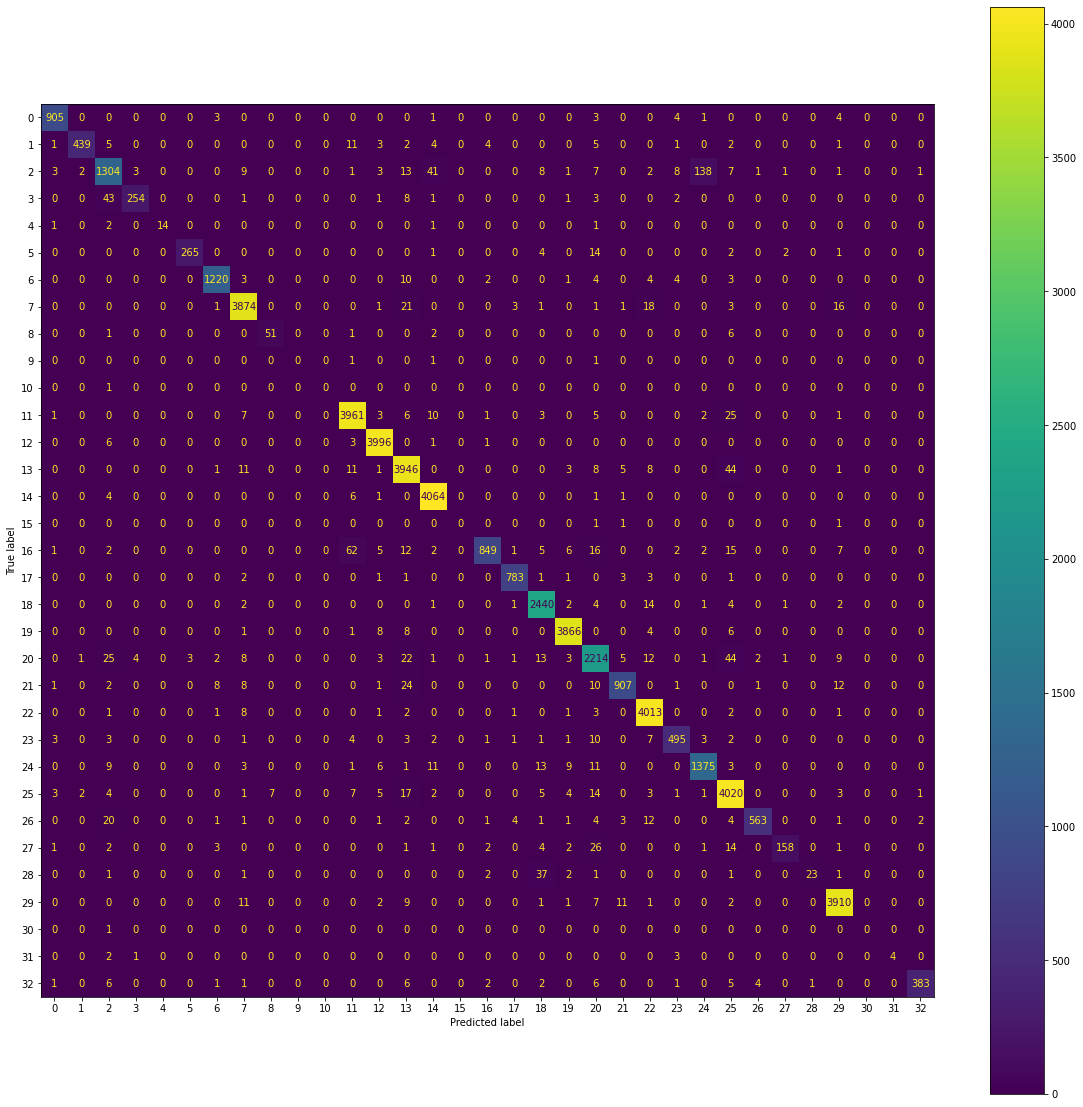

In [64]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### 6.4.2 Gradient Boosting

In [65]:
gbc_model = GradientBoostingClassifier(random_state=1)
gbc_model.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
              train_df['Categoría macro Aurum'].values)

GradientBoostingClassifier(random_state=1)

In [66]:
predictions = gbc_model.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [67]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.9378625807073335
F1-score: 0.7071898534227573


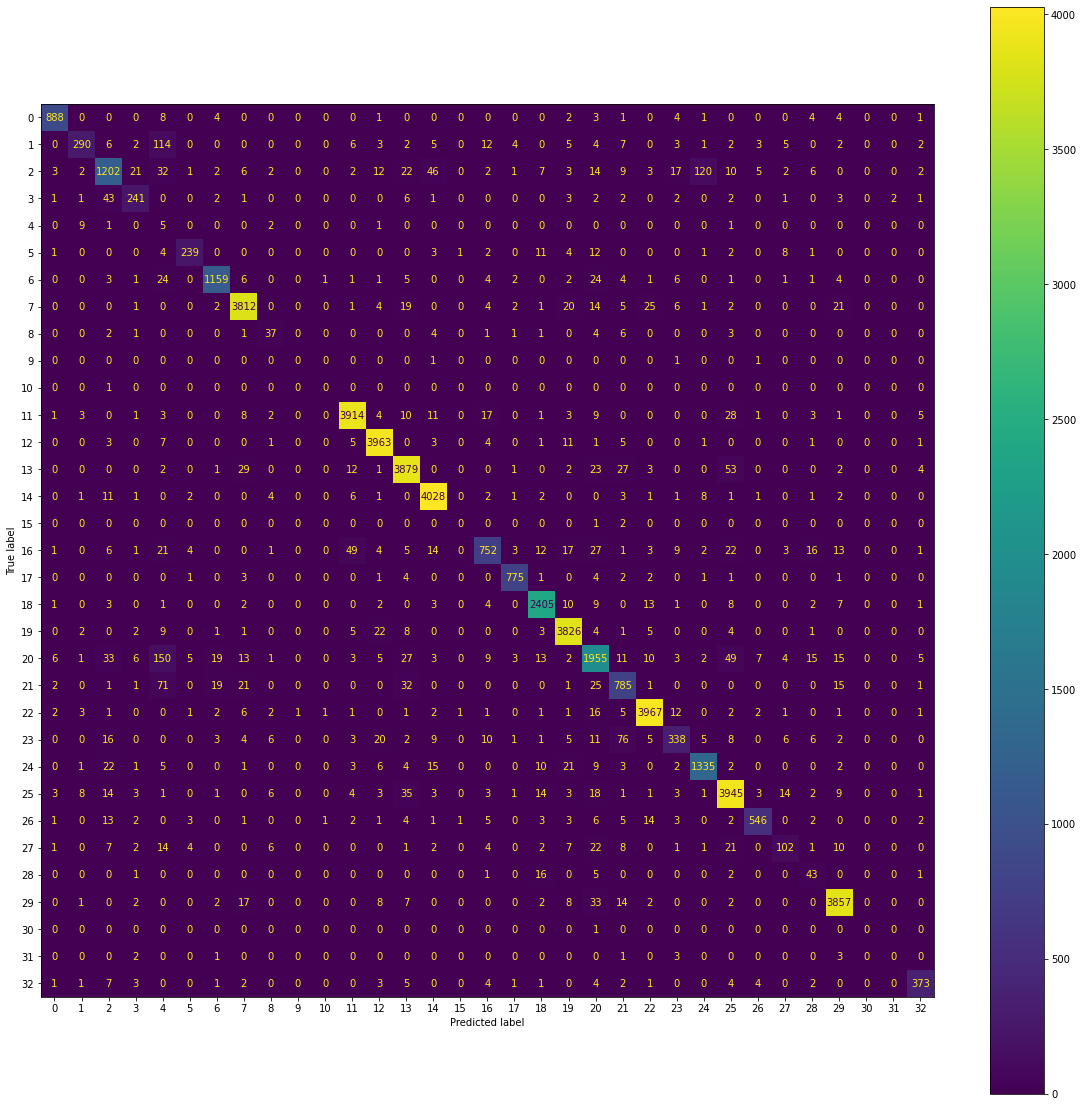

In [68]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### 6.4.3 Gradient Boosting (Light GBM)

In [95]:
lgbmc_model = LGBMClassifier(random_state=1)
lgbmc_model.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
                train_df['Categoría macro Aurum'].values)

LGBMClassifier(random_state=1)

In [96]:
predictions = lgbmc_model.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [97]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.7259323503902863
F1-score: 0.43217645980493485


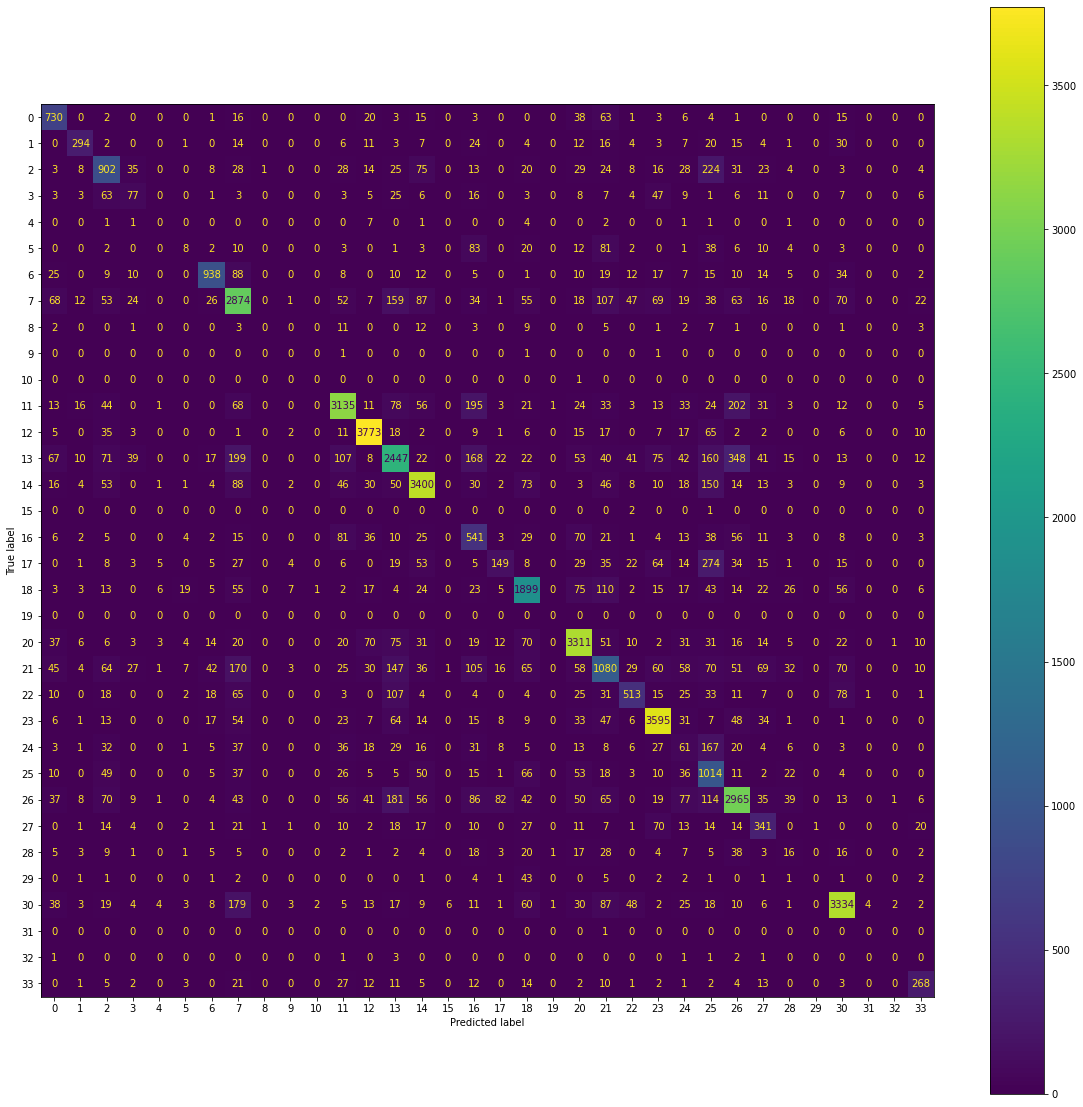

In [98]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

### 6.5 Best models parameter optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

#### 6.5.1 Random Forest

In [44]:
parameters = {'n_estimators': [50, 100, 200], 'max_depth': [10, 50, None]}
rfc_model = RandomForestClassifier(random_state=1)

grid_rfc = GridSearchCV(rfc_model, parameters, cv=2, scoring=['accuracy', 'f1_macro'], refit='f1_macro', verbose=3)
grid_rfc.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
             train_df['Categoría macro Aurum'].values)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


C:\Users\Victor\.virtualenvs\Project-ZNGcP0TM\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


[CV 1/2] END max_depth=10, n_estimators=50; accuracy: (test=0.865) f1_macro: (test=0.574) total time=  12.3s
[CV 2/2] END max_depth=10, n_estimators=50; accuracy: (test=0.866) f1_macro: (test=0.560) total time=  11.8s
[CV 1/2] END max_depth=10, n_estimators=100; accuracy: (test=0.866) f1_macro: (test=0.573) total time=  22.8s
[CV 2/2] END max_depth=10, n_estimators=100; accuracy: (test=0.871) f1_macro: (test=0.562) total time=  22.7s
[CV 1/2] END max_depth=10, n_estimators=200; accuracy: (test=0.868) f1_macro: (test=0.576) total time=  45.2s
[CV 2/2] END max_depth=10, n_estimators=200; accuracy: (test=0.872) f1_macro: (test=0.564) total time=  44.5s
[CV 1/2] END max_depth=50, n_estimators=50; accuracy: (test=0.959) f1_macro: (test=0.780) total time=  20.2s
[CV 2/2] END max_depth=50, n_estimators=50; accuracy: (test=0.960) f1_macro: (test=0.755) total time=  19.3s
[CV 1/2] END max_depth=50, n_estimators=100; accuracy: (test=0.962) f1_macro: (test=0.786) total time=  38.6s
[CV 2/2] END m

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 50, None],
                         'n_estimators': [50, 100, 200]},
             refit='f1_macro', scoring=['accuracy', 'f1_macro'], verbose=3)

In [36]:
predictions = grid_rfc.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [113]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.8932061289389998
F1-score: 0.6126880435549121


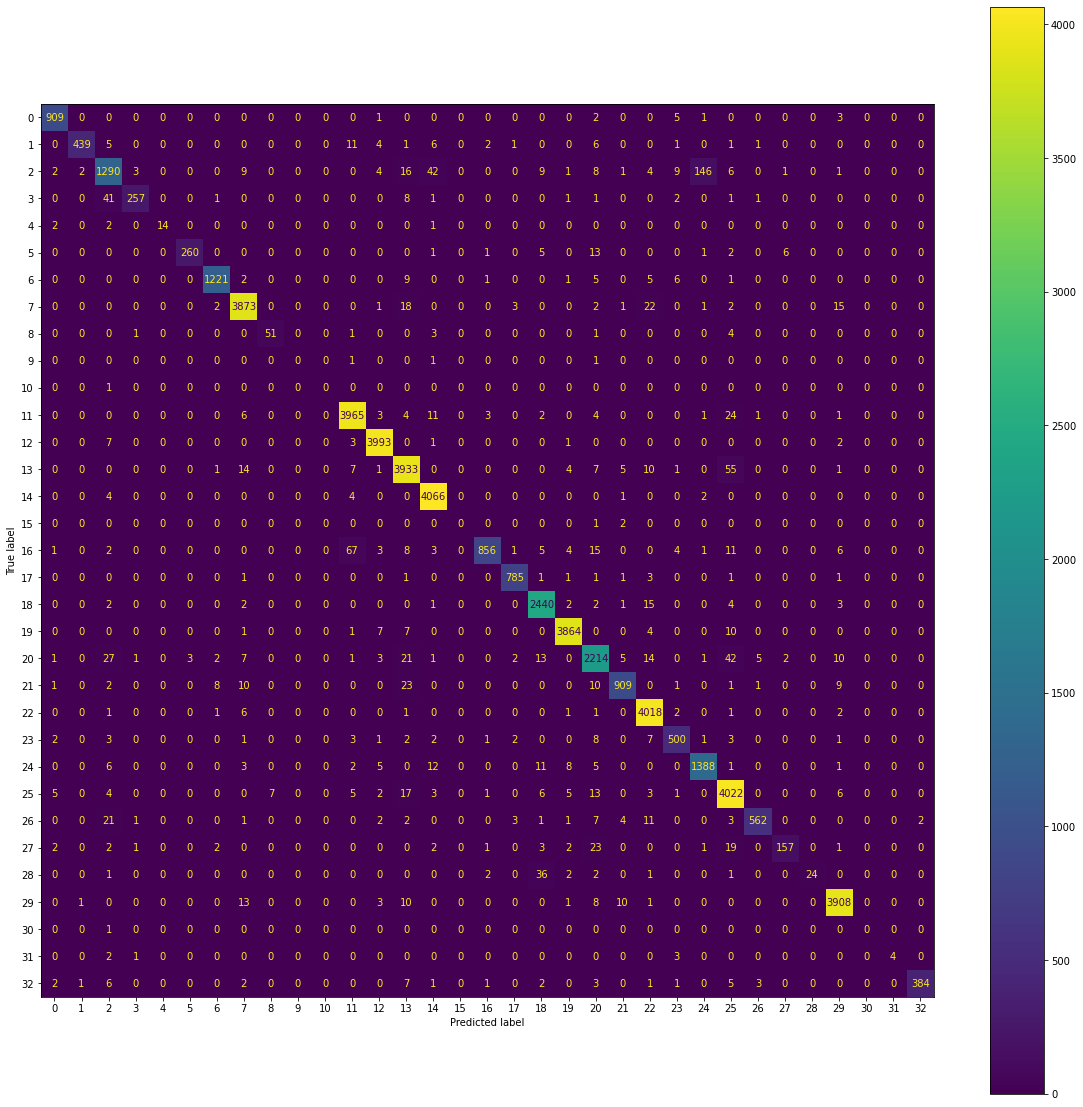

In [38]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### 6.5.2 Multi-Layer Perceptron

In [45]:
parameters = {'hidden_layer_sizes': [(16, 8, 8), (8, 4)], 'alpha': [1e-3, 5e-4, 1e-4]}
mlp_model = MLPClassifier(solver='adam', random_state=1, max_iter=1000, early_stopping=True)

grid_mlp = GridSearchCV(mlp_model, parameters, verbose=3, scoring=['accuracy', 'f1_macro'], refit='f1_macro', cv=2)

grid_mlp.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
             train_df['Categoría macro Aurum'].values)


Fitting 2 folds for each of 6 candidates, totalling 12 fits


C:\Users\Victor\.virtualenvs\Project-ZNGcP0TM\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


[CV 1/2] END alpha=0.001, hidden_layer_sizes=(16, 8, 8); accuracy: (test=0.900) f1_macro: (test=0.632) total time= 1.7min
[CV 2/2] END alpha=0.001, hidden_layer_sizes=(16, 8, 8); accuracy: (test=0.896) f1_macro: (test=0.596) total time=  57.8s
[CV 1/2] END alpha=0.001, hidden_layer_sizes=(8, 4); accuracy: (test=0.767) f1_macro: (test=0.395) total time= 1.3min
[CV 2/2] END alpha=0.001, hidden_layer_sizes=(8, 4); accuracy: (test=0.764) f1_macro: (test=0.384) total time=  54.3s
[CV 1/2] END alpha=0.0005, hidden_layer_sizes=(16, 8, 8); accuracy: (test=0.897) f1_macro: (test=0.623) total time= 1.7min
[CV 2/2] END alpha=0.0005, hidden_layer_sizes=(16, 8, 8); accuracy: (test=0.898) f1_macro: (test=0.601) total time= 1.4min
[CV 1/2] END alpha=0.0005, hidden_layer_sizes=(8, 4); accuracy: (test=0.759) f1_macro: (test=0.392) total time= 1.1min
[CV 2/2] END alpha=0.0005, hidden_layer_sizes=(8, 4); accuracy: (test=0.760) f1_macro: (test=0.377) total time=  43.3s
[CV 1/2] END alpha=0.0001, hidden_la

GridSearchCV(cv=2,
             estimator=MLPClassifier(early_stopping=True, max_iter=1000,
                                     random_state=1),
             param_grid={'alpha': [0.001, 0.0005, 0.0001],
                         'hidden_layer_sizes': [(16, 8, 8), (8, 4)]},
             refit='f1_macro', scoring=['accuracy', 'f1_macro'], verbose=3)

In [104]:
predictions = grid_mlp.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [105]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.8932061289389998
F1-score: 0.6126880435549121


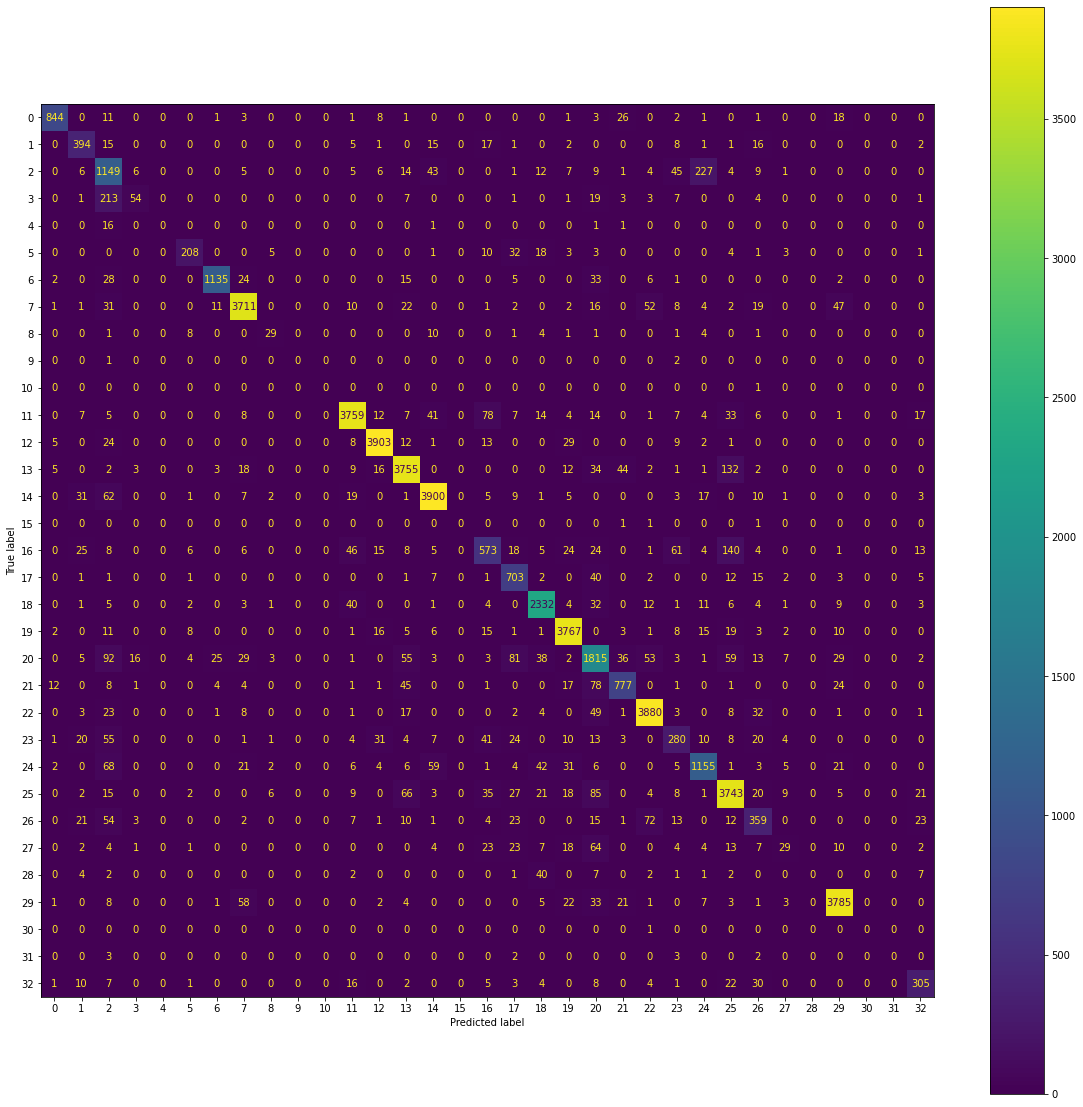

In [106]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### 6.5.3 Gradient Boosting (Light GBM)

In [100]:
parameters = {'n_estimators': [50, 100, 200], 'learning_rate': [0.5, 0.1, 0.01, 0.001]}
lgbmc_model = LGBMClassifier(random_state=1)

grid_lgbmc = GridSearchCV(lgbmc_model, parameters, verbose=3, scoring=['accuracy', 'f1_macro'], refit='f1_macro', cv=2)
grid_lgbmc.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
               train_df['Categoría macro Aurum'].values)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


C:\Users\Victor\.virtualenvs\Project-ZNGcP0TM\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


[CV 1/2] END learning_rate=0.5, n_estimators=50; accuracy: (test=0.243) f1_macro: (test=0.070) total time=   4.2s
[CV 2/2] END learning_rate=0.5, n_estimators=50; accuracy: (test=0.252) f1_macro: (test=0.108) total time=   3.7s
[CV 1/2] END learning_rate=0.5, n_estimators=100; accuracy: (test=0.243) f1_macro: (test=0.070) total time=   6.1s
[CV 2/2] END learning_rate=0.5, n_estimators=100; accuracy: (test=0.252) f1_macro: (test=0.108) total time=   6.2s
[CV 1/2] END learning_rate=0.5, n_estimators=200; accuracy: (test=0.243) f1_macro: (test=0.070) total time=  11.1s
[CV 2/2] END learning_rate=0.5, n_estimators=200; accuracy: (test=0.252) f1_macro: (test=0.108) total time=  11.5s
[CV 1/2] END learning_rate=0.1, n_estimators=50; accuracy: (test=0.812) f1_macro: (test=0.539) total time=   7.3s
[CV 2/2] END learning_rate=0.1, n_estimators=50; accuracy: (test=0.835) f1_macro: (test=0.554) total time=   7.0s
[CV 1/2] END learning_rate=0.1, n_estimators=100; accuracy: (test=0.307) f1_macro: (

GridSearchCV(cv=2, estimator=LGBMClassifier(random_state=1),
             param_grid={'learning_rate': [0.5, 0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200]},
             refit='f1_macro', scoring=['accuracy', 'f1_macro'], verbose=3)

In [101]:
predictions = grid_lgbmc.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [102]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.9598727956056664
F1-score: 0.8086958624299216


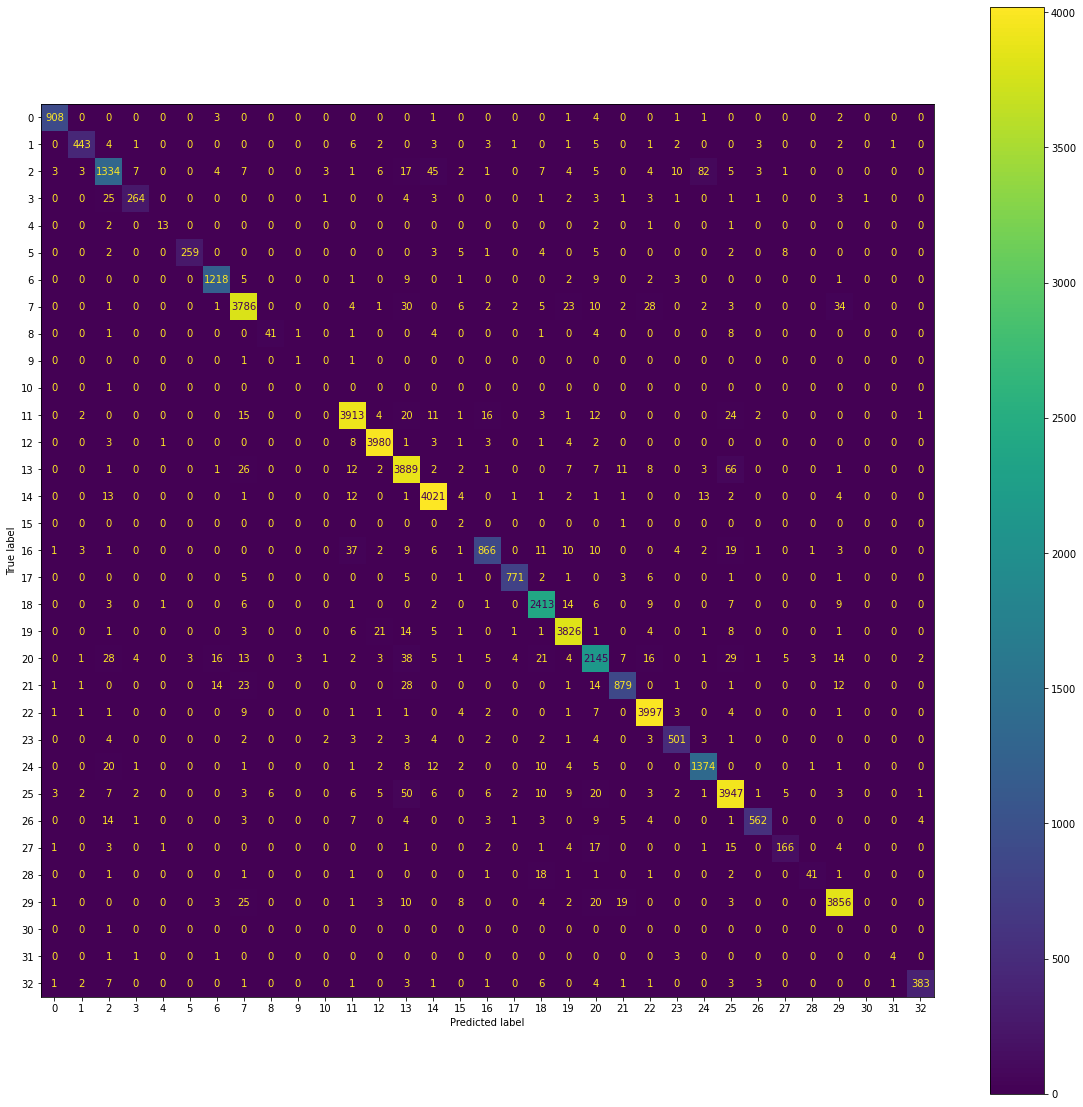

In [103]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

### 6.5 Best models parameter optimization

#### 6.5.1 Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[50, 100, 200], 'criterion':["gini", "entropy", "log_loss"], 'max_depth':[10, 50, None]}
rfc_model = RandomForestClassifier()

grid_rfc = GridSearchCV(rfc_model, parameters)
grid_rfc.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
             train_df['Categoría macro Aurum'].values)

c:\Users\spost\anaconda3\envs\ml_project\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
predictions = grid_rfc.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [ ]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

In [ ]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### 6.5.2 Multi-Layer Perceptron

In [ ]:
parameters = {'hidden_layer_sizes':[(16, 8, 8), (8, 4)], 'alpha':[1e-3, 5e-4, 1e-4]}
mlp_model = MLPClassifier(solver='adam', random_state=1, max_iter=1000,
                         early_stopping=True, verbose=True)

grid_mlp = GridSearchCV(mlp_model, parameters)

grid_mlp.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
             train_df['Categoría macro Aurum'].values)

In [ ]:
predictions = grid_mlp.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [ ]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

In [ ]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)